In [4]:
import pandas as pd 
df1 = pd.read_csv("fct_invoice.csv")
df2 = pd.read_json("dim_customer.json")

In [6]:
#easy 1 how many unique customers are in the dataset? 

df1['customer_id'].nunique()


5191

In [11]:
# easy 2a What are the different categories of products available?

df1['category'].unique()

array(['Clothing', 'Shoes', 'Books', 'Cosmetics', 'Food & Beverage',
       'Toys', 'Technology', 'Souvenir'], dtype=object)

In [12]:
#easy 2b How many unique categories are there?

df1['category'].nunique()

8

In [18]:
#3 easy Which payment method is the most popular? How many times was it used?

df1['payment_method'].value_counts().to_frame()

,payment_method
Cash,44447
Credit Card,34931
Debit Card,20079


In [32]:
#1 medium What are the three most popular categories, by total sales?

total_sales = df1['quantity']*df1['price']
df1["total_sales"] = total_sales

df1.groupby("category")["total_sales"].sum().nlargest(3).to_frame()


,total_sales
category,
Clothing,1.139968e+08
Shoes,6.655345e+07
Technology,5.786235e+07


In [39]:
#2 medium What are the total sales attributed to customers over the age of 45?

df3=pd.merge(df1,df2,left_on="customer_id",right_on="id")
ageover45 = df3[df3["age"]>45]
ageover45["total_sales"].sum()

82039768.15

/var/folders/fy/1czn4lg12kl3qhdg76qrsx_w0000gp/T/ipykernel_9548/3759865974.py:6: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  sales_dist.index = pd.to_datetime(sales_dist.index)


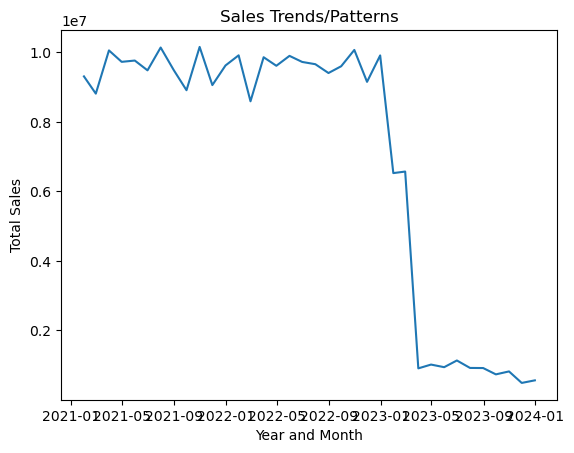

In [65]:
#3 medium How is the data distributed across different invoice dates? Are there any seasonal trends or patterns? (Use a graph for this.)

sales_dist = df3.groupby("invoice_date")["total_sales"].sum().to_frame()
import matplotlib.pyplot as plt

sales_dist.index = pd.to_datetime(sales_dist.index)

monthly_sales = sales_dist.resample("M").sum()

plt.plot(monthly_sales.index, monthly_sales["total_sales"])

plt.xlabel("Year and Month")
plt.ylabel("Total Sales")
plt.title("Sales Trends/Patterns")

plt.show()



In [71]:
#1 hard Create a pivot table showing the breakdown of sales across these dimensions, in this order: category, decade age range (e.g., 10-19, 20-29, and so forth).

df3['decade_age_range'] = pd.cut(df3['age'], bins=range(0, 101, 10), labels=[f"{i}-{i+9}" for i in range(0, 100, 10)], right=False)
pivot_table = df3.pivot_table(index='category', columns='decade_age_range', values='total_sales', aggfunc='sum')

pivot_table

decade_age_range,0-9,10-19,20-29,30-39,40-49,50-59,60-69,70-79,80-89,90-99
category,,,,,,,,,,
Books,0.0,12801.75,79461.75,84143.10,87203.40,74962.20,80476.80,54827.85,26664.00,0.0
Clothing,0.0,1927413.84,10250732.80,11354126.96,11215189.92,10321851.76,10660642.08,7769371.28,4493698.00,0.0
Cosmetics,0.0,109619.36,605915.32,723544.70,665034.96,587780.96,649990.76,419082.62,254531.60,0.0
Food & Beverage,0.0,13582.31,73491.96,87246.86,89553.29,72425.04,80976.09,55050.98,31332.93,0.0
Shoes,0.0,993281.35,5924878.24,7200839.66,7025590.02,5852857.84,5978893.54,4480269.05,2628744.60,0.0
Souvenir,0.0,12375.15,54943.32,64092.72,66391.80,54943.32,55025.43,38673.81,23718.06,0.0
Technology,0.0,1129800.00,5261550.00,6159300.00,5954550.00,4435200.00,5471550.00,3638250.00,1946700.00,0.0
Toys,0.0,60426.24,385100.80,420582.40,390906.88,345067.52,363955.20,273244.16,153932.80,0.0
